In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [11]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [12]:
train_df.info()
train_df.head()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

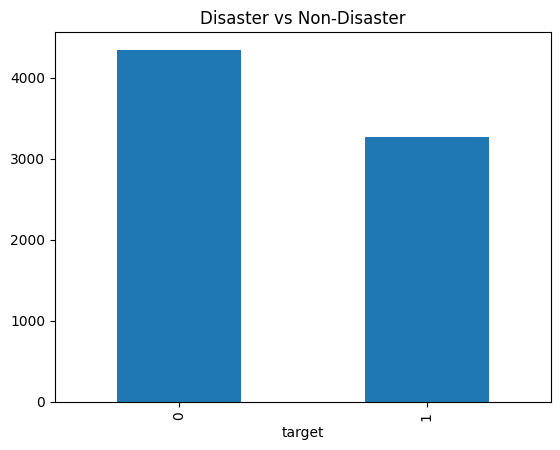

In [13]:
train_df["target"].value_counts(normalize=True)
train_df["target"].value_counts().plot(kind="bar", title="Disaster vs Non-Disaster");

In [14]:
import re

def clean_text(text):
    # Lowercase everything
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove punctuations and numbers
    text = re.sub(r"[^a-z\s]", '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [15]:
train_df["clean_text"] = train_df["text"].apply(clean_text)

In [17]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can increase this if you want

# Fit on clean_text and transform it into numerical vectors
X = vectorizer.fit_transform(train_df["clean_text"])
y = train_df["target"]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on validation set
val_preds = model.predict(X_val)
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.83      0.69      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [21]:
test_df["clean_text"] = test_df["text"].apply(clean_text)

In [23]:
X_test = vectorizer.transform(test_df["clean_text"])

In [25]:
test_preds = model.predict(X_test)


In [26]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "target": test_preds
})

submission.to_csv("submission.csv", index=False)
